## 1. Import Library

In [88]:
!pip install textract==1.6.3
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. Exctract the Text from Dataset

In [89]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [90]:
os.listdir('/content/drive/MyDrive/Resumes')

['workday resumes',
 'SQL Developer Lightning insight',
 'Peoplesoft resumes',
 'Internship',
 'Reactjs developer']

In [91]:
!apt-get install antiword

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
antiword is already the newest version (0.37-16).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [92]:
file_path1 = []
category1  = []
directory1 = r'/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith(('.docx','.doc')):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [93]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,\n PEOPLESOFT Adminis...,PeopleSoft
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,\n|Personal Details ...,PeopleSoft
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
8,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft
9,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft


In [94]:
file_path2 = []
category2  = []
directory2 = r'/content/drive/MyDrive/Resumes/Reactjs developer'
for i in os.listdir(directory2):
    if i.endswith(('.docx','.doc','.pdf')):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [95]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
1,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
4,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
5,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer
6,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
7,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
9,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer


In [96]:
file_path3 = []
category3  = []
directory3 = r'/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory3):
    if i.endswith(('.docx','.doc')):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [97]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
1,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer
2,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
3,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
4,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
5,BUDDHA VAMSI ...,SQL Developer
6,\n SQL S...,SQL Developer
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
8,KAMBALLA PRADEEP ...,SQL Developer
9,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer


In [98]:
file_path4 = []
category4  = []
directory4 = r'/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory4):
     if i.endswith(('.docx','.doc')):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [99]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
1,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
2,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
3,Workday HCM Techno functional Consultant ...,Workday
4,\n\n Madeeswar A\n...,Workday
5,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday
6,\n[pic] Name...,Workday
7,\nShireesh ...,Workday
8,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
9,\n Workday Integration Consultant\n\nName...,Workday


In [100]:
file_path5 = []
category5  = []
directory5 = r'/content/drive/MyDrive/Resumes/Internship'
for i in os.listdir(directory5):
     if i.endswith(('.docx','.doc')):
        os.path.join(directory5, i)
        file_path5.append((textract.process(os.path.join(directory5, i))).decode('utf-8'))
        category5.append('Internship')

In [101]:
data5 = pd.DataFrame(data = file_path5 , columns = ['Raw_Details'])
data5['Category5'] = category5
data5

,Raw_Details,Category5
0,Name: Ravali P \n\n\n\n ...,Internship
1,SUSOVAN BAG \n\nSeeking a challenging po...,Internship


## 3. Create a DataFrame

In [102]:
resume_data = pd.concat([data1, data2, data3, data4,data5], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5
0,\n PEOPLESOFT Adminis...,PeopleSoft,NaN,NaN,NaN,NaN
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,NaN
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,NaN
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,PeopleSoft,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,NaN,NaN,NaN,Workday,NaN
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,NaN
76,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,NaN,NaN,NaN,Workday,NaN
77,Name: Ravali P \n\n\n\n ...,NaN,NaN,NaN,NaN,Internship


In [103]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    22 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
 5   Category5    2 non-null      object
dtypes: object(6)
memory usage: 3.8+ KB


### 3.1 Merge all Unnecessary column in One Column

In [104]:
resume_data['Category'] = category1 + category2 + category3 + category4+ category5
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5,Category
0,\n PEOPLESOFT Adminis...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,PeopleSoft,NaN,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,NaN,NaN,NaN,Workday,NaN,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,NaN,Workday
76,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,NaN,NaN,NaN,Workday,NaN,Workday
77,Name: Ravali P \n\n\n\n ...,NaN,NaN,NaN,NaN,Internship,Internship


In [105]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4','Category5'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [106]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,\n PEOPLESOFT Adminis...
1,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,\n|Personal Details ...
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,PeopleSoft,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...
9,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...


In [107]:
resume_data["Raw_Details"][4]

'\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nProfessional Summary:\n\n  ➢ Having 7+years of experience in PeopleSoft Admin/Dba implementation and\n    Supporting PeopleSoft applications Like HCM/FSCM modules on Oracle\n    Database and their supporting operating systems.\n  ➢ Implementing PeopleSoft Internet architecture(PIA) on\n    Demo,Dev,Test,Production Instances.\n  ➢ Experience in configuration of Application Server Domains and Process\n    Scheduler Setup.\n  ➢ Performed Installation, configuration and maintained Oracle 10g/11g/12C\n    databases on UNIX, Linux and NT Servers.\n  ➢ Experience in Project Migration and Data Migration.\n  ➢ Experience in generating Compare Reports between various environments.\n  ➢ Worked on applying Patches, Bundles and Tax Updates.\n  ➢ Configuring Change Assistant to apply Bundles and Tax updates.\n  ➢ Maintaining integrity and internal consistency of the database using\n    DDDAUDIT, SYSAUDIT, ALTERAUDIT reports periodically.\n  ➢ Experienced i

### 3.3 Save new CSV File

In [108]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## 4. Data Understanding

In [109]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,\n PEOPLESOFT Adminis...
1,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...
...,...,...
74,Workday,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
77,Internship,Name: Ravali P \n\n\n\n ...


In [110]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
56,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
57,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
58,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
59,Workday,Workday HCM Techno functional Consultant ...
60,Workday,\n\n Madeeswar A\n...
61,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
62,Workday,\n[pic] Name...
63,Workday,\nShireesh ...
64,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
65,Workday,\n Workday Integration Consultant\n\nName...


In [111]:
resume_data.isnull().sum()

,0
Category,0
Raw_Details,0


### 4.1 Number of Words in each Resume

In [112]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,\n PEOPLESOFT Adminis...,4965
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2189
3,Classification: Internal\n\nClassification: In...,558
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,4615


### 4.2 Number of Characters

In [113]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,\n PEOPLESOFT Adminis...,21007
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,8847
3,Classification: Internal\n\nClassification: In...,4917
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,16983


### 4.3 Number of Stopwords

In [114]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,\n PEOPLESOFT Adminis...,640
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,186
3,Classification: Internal\n\nClassification: In...,114
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,356


### 4.4 Number of Numerics

In [116]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,\n PEOPLESOFT Adminis...,10
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,6
3,Classification: Internal\n\nClassification: In...,7
4,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,18


In [117]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,\n PEOPLESOFT Adminis...,4965,21007,640,10
1,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2189,8847,186,6
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,4615,16983,356,18
...,...,...,...,...,...,...
74,Workday,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,1283,5332,141,3
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
76,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,716,5951,161,1
77,Internship,Name: Ravali P \n\n\n\n ...,1795,6175,179,12


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [118]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [119]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [120]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,\n PEOPLESOFT Adminis...,peoplesoft administrator srinivas experience s...
1,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,profile summary years experience implementing ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,vinod akkala peoplesoft dba admin professional...
...,...,...,...
74,Workday,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,pic pic years experience workday hcm technical...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,ramesh workday hcm consultant professional sum...
77,Internship,Name: Ravali P \n\n\n\n ...,name ravali curriculum vitae specialization co...


### 5.3 Save the Clean Data in new CSV File

In [121]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administrator srinivas experience s...
1,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,vinod akkala peoplesoft dba admin professional...
...,...,...
74,Workday,pic pic years experience workday hcm technical...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,ramesh workday hcm consultant professional sum...
77,Internship,name ravali curriculum vitae specialization co...


In [122]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [123]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administrator srinivas experience s...
1,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,vinod akkala peoplesoft dba admin professional...
...,...,...
74,Workday,pic pic years experience workday hcm technical...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,ramesh workday hcm consultant professional sum...
77,Internship,name ravali curriculum vitae specialization co...


In [124]:
resume_data.Resume_Details[5]

'hari narayana professional summary years experience peoplesoft application enhancement implementation data conversion support upgrade projects well experienced people tools functional knowledge hcm fscm applications skill people tools application designer application engine people code application packages peoplesoft application fscm hcm applications fscm modules procurement billing hcm modules recruiting performance management waf benefits interfaces component interface file layout languages database oracle sql server operating system windows unix education bachelor technology tech jntu currently working people soft consultant randstad hyderabad relevant experience peoplesoft consultant randstad hyderabad andhra pradesh india june till date project randstad enhancements client randstad staffing responsibilities analyze requirement documents understand customer business requirement provide technical approach fdd assign customize system applications designed many objects scratch write 

## 6. Named Entity Recognition (NER)

In [125]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [126]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('reports', 326), ('project', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


## 7. Parts Of Speech (POS) Tagging

In [127]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [128]:
nlp = spacy.load('en_core_web_lg')
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [129]:
for token in doc_block[:30]:
    print(token,token.pos_)

bol NOUN
installation NOUN
troubleshooting NOUN
compiling VERB
cobol NOUN
issues NOUN
performed VERB
integration NOUN
broker NOUN
setup NOUN
two NUM
modules NOUN
worked VERB
instance NOUN
verification NOUN
test NOUN
data NOUN
refresh VERB
production NOUN
ensuring VERB
data NOUN
integrity NOUN
using VERB
tools NOUN
dddaudit NOUN
sysaudit NOUN
development NOUN
phases NOUN
helped VERB
create VERB


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [130]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['administrator', 'summary', 'years', 'experience', 'peoplesoft', 'administrator', 'experience', 'installations', 'configurations', 'security', 'system', 'administration', 'implementing', 'supporting', 'database', 'administration', 'dba', 'including', 'resource', 'management', 'system', 'hrms', 'systems', 'knowledge', 'experience', 'administrating', 'server', 'components', 'peoplesoft', 'application', 'servers', 'process', 'scheduler', 'servers', 'tuxedo', 'web', 'logic', 'internet', 'architecture', 'application', 'messaging', 'integration', 'broker', 'application', 'issues', 'issues', 'installing', 'administering', 'peoplesoft', 'software', 'configuring', 'workstations', 'application', 'server', 'process', 'scheduler', 'tuxedo', 'web', 'servers', 'report', 'repository', 'report', 'nodes', 'peoplesoft', 'applications', 'installed', 'search', 'configured', 'understanding', 'architecture', 'tools', 'performing', 'patches', 'updates', 'upgrades', 'implement', 'plans', 'data', 'migration',

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [131]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,411
2,using,394
3,reports,326
4,workday,313
5,data,309
6,project,300
7,business,262
8,web,250
9,database,240


### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

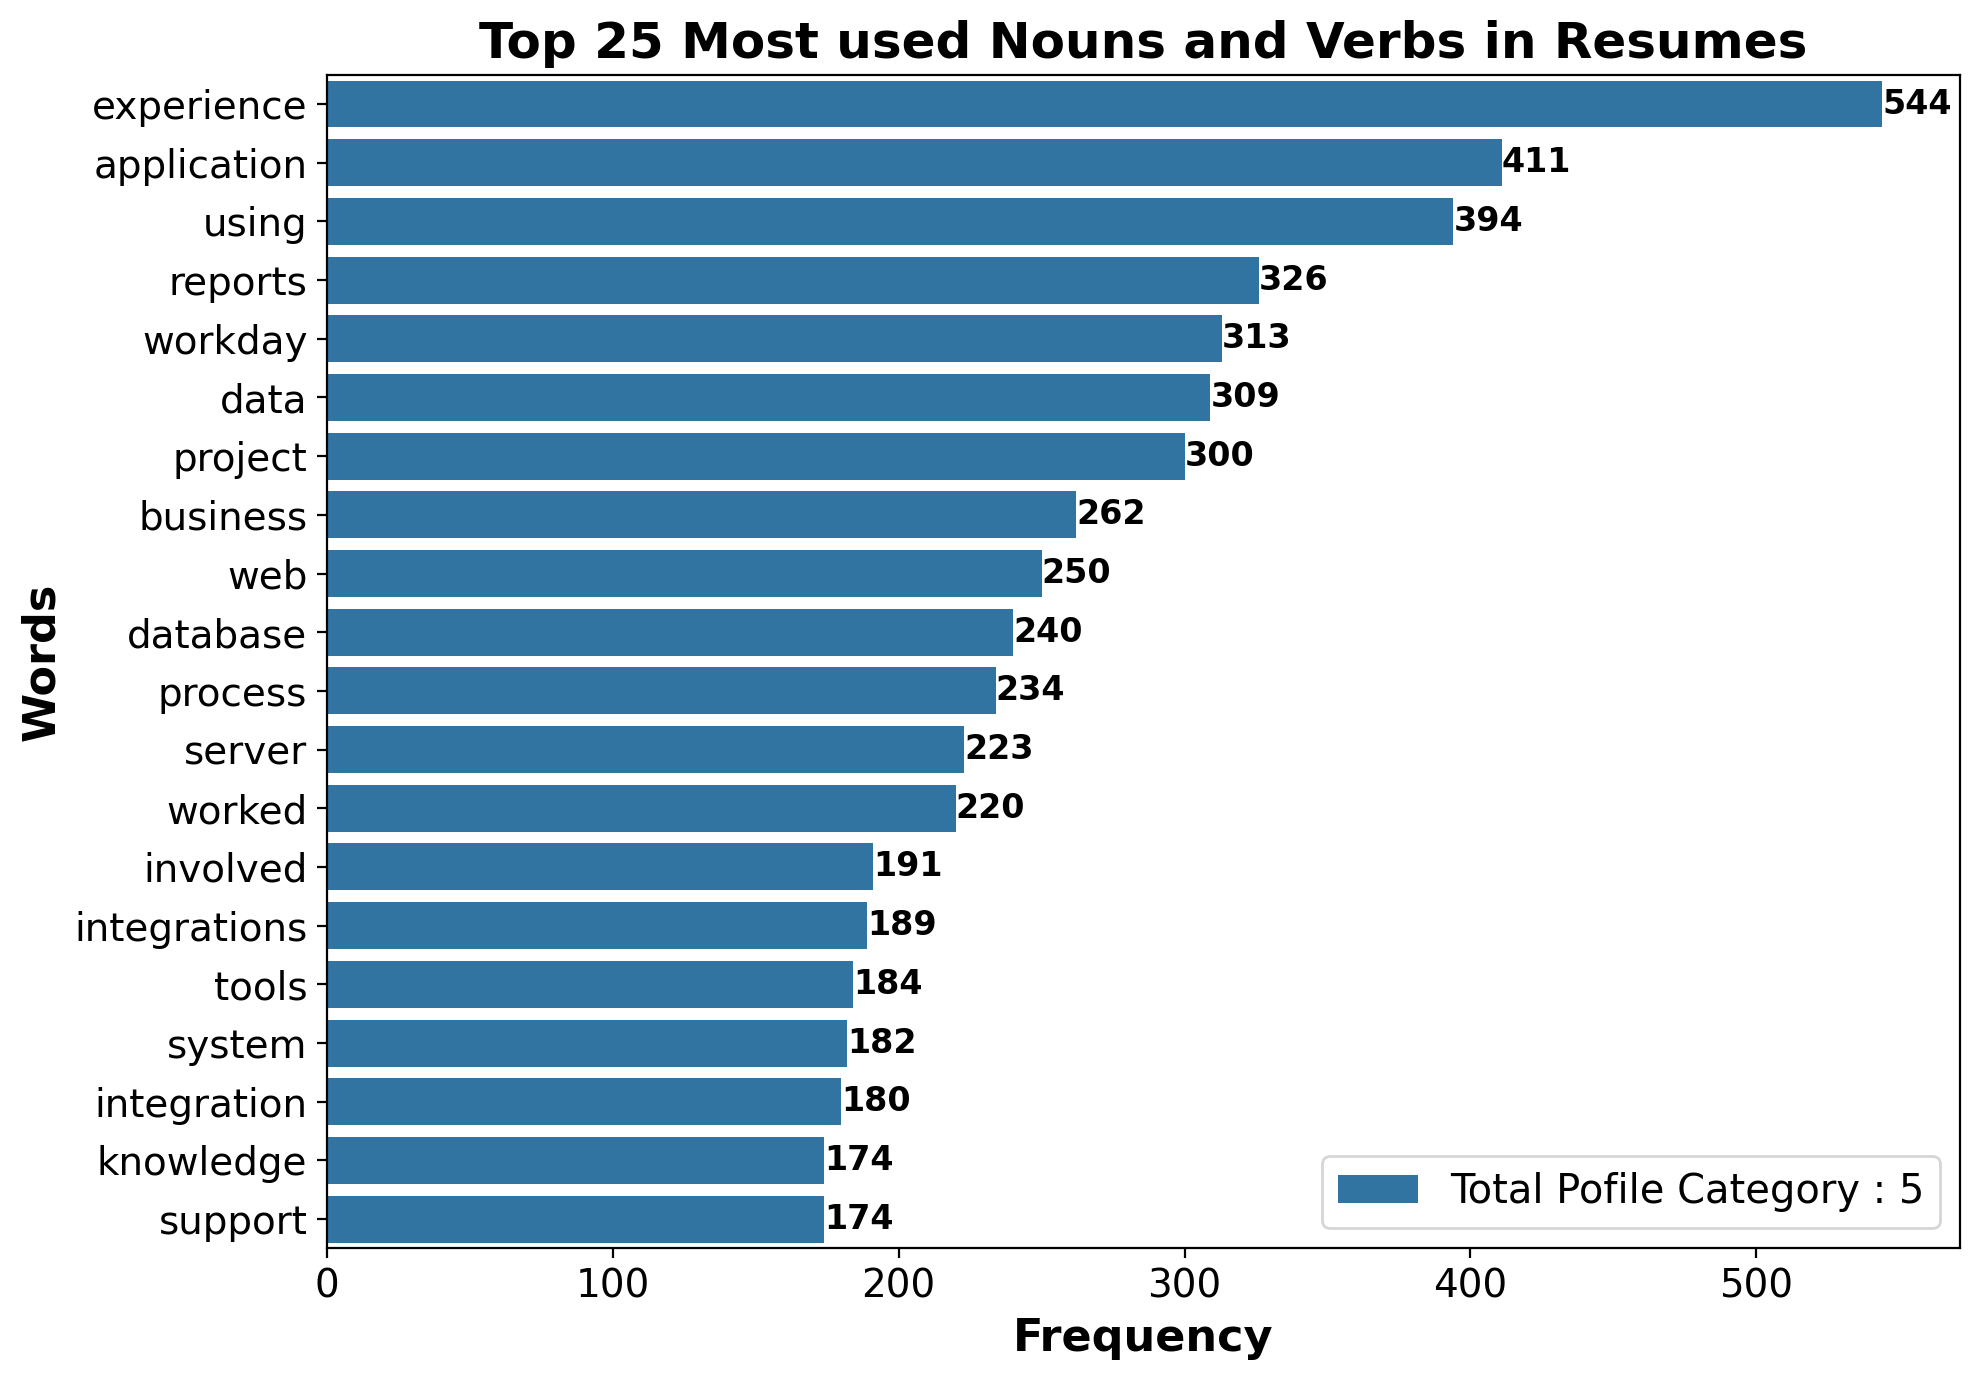

In [132]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

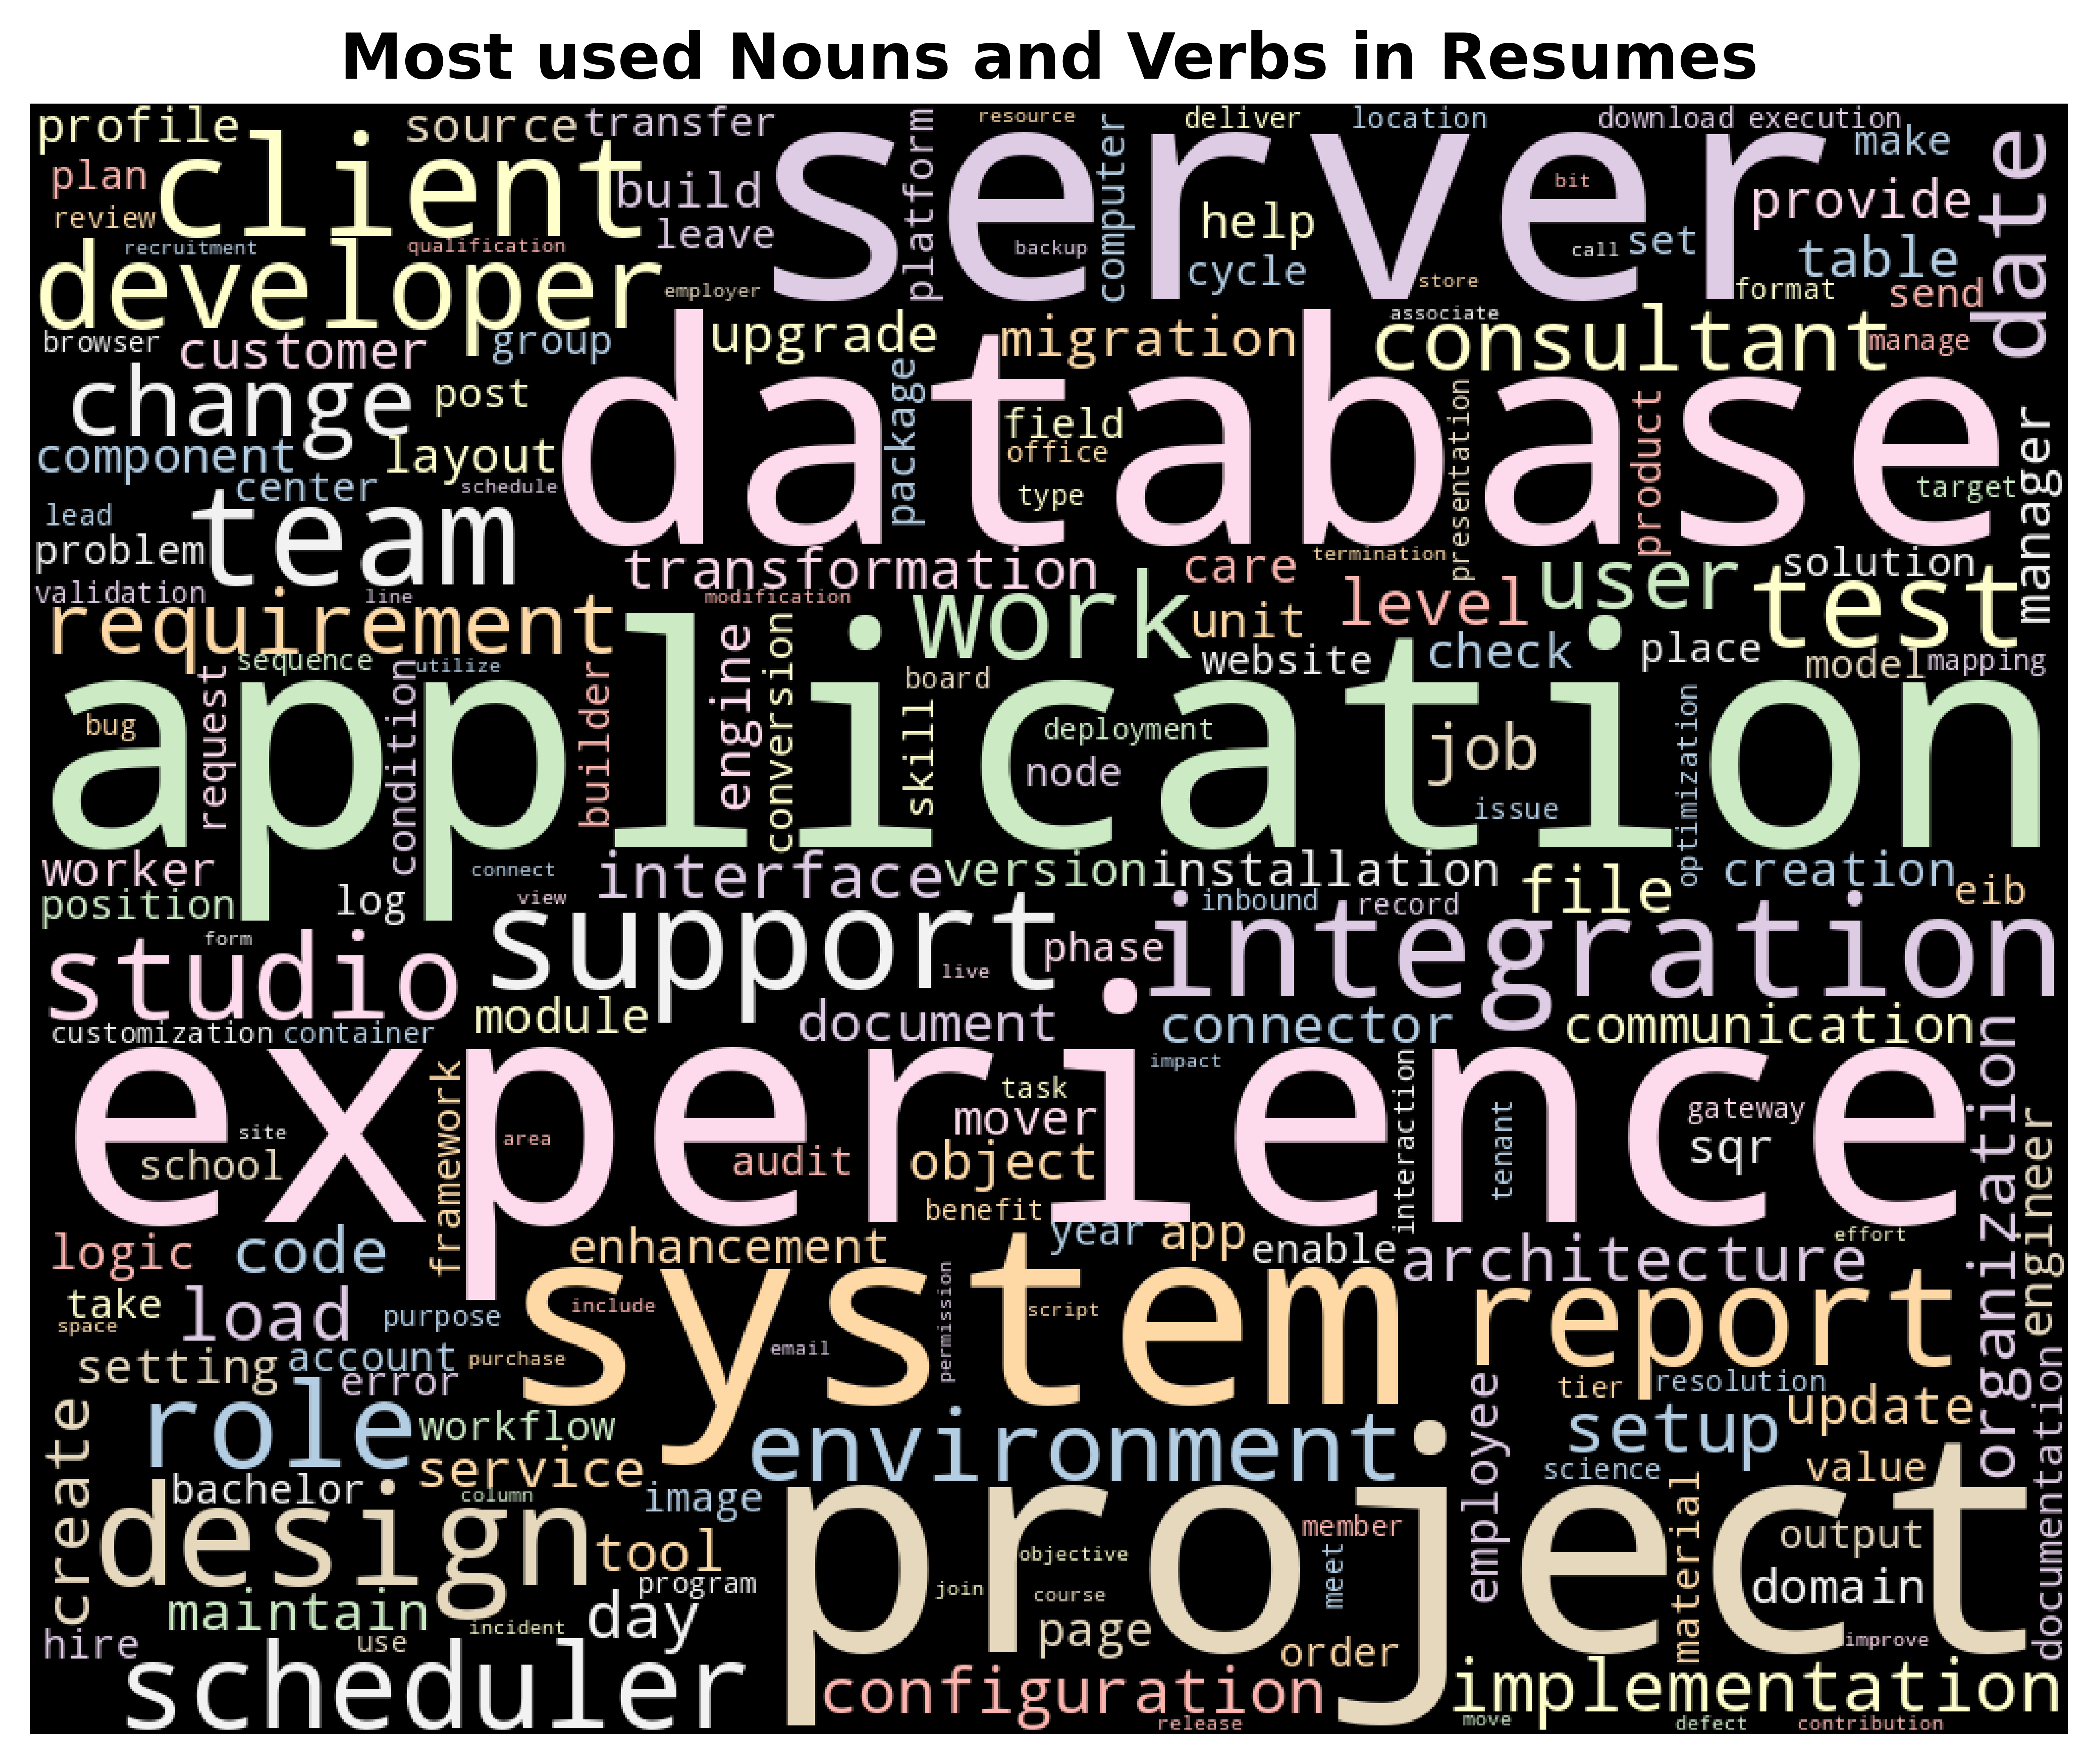

In [133]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# THE END !!!